> **Student Names and IDs**:
>
> Yiteng Lu (2488152)
> Wenge Xie(2466824)
> Zengtian Deng (2207324)

# Homework 5

## Homework Submission Workflow

When you submit your work, follow the instructions on the [submission workflow page](https://www.cs.duke.edu/courses/fall18/compsci371d/homework/workflow.html) for full credit, but see the changes mentioned below.

**Important: Failure to do any of the following will result in lost points:**

- Submit **one** PDF file and **one** notebook per group

- Enter **all the group members** through the Gradescope GUI when you submit your PDF files. It is **not** enough to list group members in your documents

- Match each **answer** (not question!) with the appropriate page in Gradescope

- Avoid large blank spaces in your PDF file

**Important changes to homework preparation workflow:** _This assignment is different from the others in that you are required to run it on the Google Colaboratory, a cloud service that Google makes available for reseach in machine learning. This is necessary because some of the problems require you to train a deep network on hardware that is faster than what is typically available on a standard laptop or desktop, including a high-end GPU. Even if you do have a high-end GPU, please run your notebook on the Colaboratory, so we can grade your work consistently._

_**To work on this assignment, go to the [Colaboratory](https://colab.research.google.com) and upload the template notebook for this assignment through the `File` menu at the top of the Colaboratory page. Then work on the assignment, making sure to pay attention to instructions in Part 4 where you are asked to change the runtime type.**_

_**When you are done, download the notebook (after making sure that all the outputs from running the code show up properly), and proceed as usual to turn that notebook into a PDF file for submission.**_

#### Programming Notes

+ The Colaboratory is a cloud service. If a notebook sits idle for a long time, it automatically disconnects from its execution kernel, and you need to rerun all the cells.
+ Some of the cells in the Part on neural networks are to be run with different runtime types, as explained later. Because of this, you will not be able to just restart the notebook and run all its cells with a single command. Instead, you need to run the cells one at a time, changing runtime type as instructed. Make sure you do this once you are done with the assignment, making sure that the output from your code matches the text where you describe that output.
+ Depending on circumstances, changing the runtime type may erase some or all of the notebook state. This will require you to rerun the cells that generate state.
+ Training depends on random initialization of the network parameters. Because of this, your results may vary relative to the sample solution, even if your code is no different. Results may also vary from run to run.

## Part 1: Exam-Style Questions, Set 1

The small neural net in the figure below uses the ReLU as the nonlinearity at the output of each neuron. The values specified in the hollow circles are biases, and the values along the edges are gains. Weigths number 1, 2, 3 refer to the first neuron, 4, 5,6 to the second, 7, 8, 9 to the third.

![a simple neural network](https://www2.cs.duke.edu/courses/spring19/compsci527/homework/5/netSimple.png)

### Problem 1.1

Are all the layers in the net above fully connected?

### Answer
Yes

### Problem 1.2

What is the output $y$ from the net above when the input is as follows?

$$
x_1 = 0 \;\;\; \text{and}\;\;\; x_2 = 3
$$

### Answer
4

### Problem 1.3

What is the gradient $\mathbf{g}$ of the output $y$ of the network above with respect to the weight vector

$$
\mathbf{w} = [w_1,\ w_2,\ w_3,\ w_4,\ w_5,\ w_6,\ w_7,\ w_8,\ w_9]^T
$$

when the input has the values given in the previous problem? Just give the result if you are confident of your answer.

### Answer
$\mathbf{w} = [0,0,0,0,3,1,0,3,1]$

## Part 2: Exam-Style Questions, Set 2




Let $\mathbf{p} = f(\mathbf{x})$ be the output of the network's soft-max layer of some neural network classifier with $K$ layers when the network's input is $\mathbf{x}$. The classifier's output is then

$$
\hat{y} = \arg\max \mathbf{p}\;.
$$

If $y_n$ is the true label corresponding to training input $\mathbf{x}_n$, the loss is $\ell_n = \ell(y_n, f(\mathbf{x}_n))$ for some appropriate loss function $\ell(y, \mathbf{p})$.

We saw in class that if $\mathbf{x}^{(k)}$ is the output from layer $k$ and $\mathbf{w}^{(k)}$ is a vector with all the parameters in layer $k$, then back-propagation computes the partial derivatives by the following recursion,  where $\mathbf{x}^{(0)} = \mathbf{x}$ is the input to the network and $\mathbf{x}^{(K)} = \mathbf{p}$:

\begin{eqnarray*}
\frac{\partial \ell_n}{\partial \mathbf{w}^{(k)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 1 \\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(k-1)}} &=& \frac{\partial \ell_n}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}}
\;\;\;\text{for}\;\;\; k = K,\ldots, 2\\
\frac{\partial \ell_n}{\partial \mathbf{x}^{(K)}} &=& \frac{\partial \ell}{\partial \mathbf{p}}
\end{eqnarray*}

The derivatives above are computed for the $n$-th training sample $(\mathbf{x}_n, y_n)$ and for the values of $\mathbf{w}^{(k)}$ that are current at any given point during training.

### Problem 2.1

Suppose that the network has only fully-connected layers (with ReLU nonlinearities) before the soft-max. Refer in detail to the equations given above to explain clearly why training would not work if the parameter vector $\mathbf{w} = [\mathbf{w}^{(1)},\ldots, \mathbf{w}^{(K)}]^T$ is initialized with zeros for training.

### Answer
Since every $\mathbf{w}$ is initialized to 0, every layer would have 0 zeros for output, which means the each layer always have the same ouput, making the gradient of $\cfrac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{x}^{(k-1)}} $ the same and equal to 0 as well, thus $\frac{\partial \mathcal{l_n}}{\partial \mathbf{x}^{(k)}} \frac{\partial \mathbf{x}^{(k)}}{\partial \mathbf{w}^{(k)}}
\;\;\;\text{for} \;\;\; k = K,\ldots, 1$ equals 0 , then the weights will not update.  


### Problem 2.2

A neural net classifier with only fully-connected layers (with ReLU nonlinearities) and a soft-max layer at its output has parameter vector $\mathbf{w}$, and the network implements the function $f(\mathbf{x}, \mathbf{w})$ for any network input $\mathbf{x}$. Is $\mathbf{w} = \mathbf{0}$ a stationary point for the function $\phi(\mathbf{w}) = f(\mathbf{x}, \mathbf{w})$ when $\mathbf{x}$ is fixed? Justify your answer.

### Answer
Yes. 
Assume $ \tilde{\mathbf{x}} = [\mathbf{x} ,1 ]$
<br>
$f(\mathbf{x},\mathbf{w}) =\text{softmax}(\mathbf{w}^{K}max({\mathbf{w}^{K-1}} ...max(\mathbf{w}^1\mathbf{x},0),0),0)$ 
since $\mathbf{w}  = \bf{0} $
<br>
Any partial deraviative with respect to $\bf{w}$ would be multiple zeros as stated in the first problem. 
<br>
Therefore, $\phi^{'}{(\bf{w})} = \bf{0}$ 
,$\bf{w= 0} $ is a stationary point. 

### Problem 2.3

Stochastic gradient descent with momentum is used to train a certain neural network with $m$ parameters. Just before iteration $t$ of training is performed, the parameter vector has value $\mathbf{w}_t$, and the velocity (or step) is $\mathbf{v}_t = \mathbf{a}$, where $\mathbf{a}$ is some nonzero vector in $\mathbb{R}^m$ (refer to the class notes for notation). The momentum coefficient is kept constant at $\mu = 0.9$ throughout training. If the risk function has a saddle point at $\mathbf{w}_t$, what is the step $\mathbf{v}_{t+1}$ at iteration $t$?

### Answer
$\mathbf{v}_{t+1} =0.9\mathbf{a}$

### Problem 2.4

A friend of yours argues that in the situation described in the previous problem, the steps after iteration $t$ decay exponentially. Her argument is based on the fact that the risk is at a saddle point at $\mathbf{w}_t$, and the momentum coefficient is constant, so that $\mathbf{v}_{t+\tau} = \mu^{\tau}\mathbf{a}$, an exponential decay. Explain why your friend's argument is wrong.

### Answer
Because we use stochastic gradient descent, even if the weights are stucked in a saddle point which means $\mathbf{w}_{t+1}$ will get updated, therefore it will not stuck in the saddle point all the time, which means, after few iterations, the gradient of the function will not be 0 any more. This will bring an ectra term into the $\mathbf{v}$ equation, and make it to be $\mathbf{v}_{t+1} = \mu a - \triangledown\frac{\partial \mathcal{l}}{\partial\mathbf{w}}$. So, it will not decay exponentially.

### Problem 2.5

In the situation described in Problem 2.3, will the training algorithm always eventually converge back towards $\mathbf{w}_t$? Explain your answer briefly and clearly.

### Answer
It will not always get the saddle point since we are using the stochastic gradient descent, it may go back to saddle point depends on the real-time gradient it sits on after it passes the saddle point at $t+1$  but it will not always converge back to $\bf{w}_t$.

## Part 3: Exam-Style Questions, Set 3

The following problems take you through the computation of the set of all least-squares solutions to the following linear system:

\begin{eqnarray*}
3x + 4y &=& 2\\
3x + 4y &=& 3
\end{eqnarray*}

and the solutions to a related optimization problem.
All the answers to the questions in this problem are numerical and exact. They refer only to the data given in the problem, and no more general answers are required. You may leave your answers in the form of fractions, with expressions like the following:

$$
\frac{\sqrt{3}}{2} \left[\begin{array}{c} 2\\-5\end{array}\right]\;,
$$

but please simplify as much as possible.

_As usual, it is easiest to answer these questions using software (and perhaps guess the exact values from the approximate ones output by your code). However, this would rob you of the opportunity to understand this material and to practice for the exam. **In any event, no answers will be accepted to problems in this part that embed software in your submission.**_


### Problem 3.1

What are $A$ and $\mathbf{b}$ if we write the system in this problem in the following form?
$$
A \mathbf{x} = \mathbf{b}
$$

### Answer
$$\bf{A} = \begin{bmatrix} 3 \; \; 4  \\ 3 \; \; 4 \end{bmatrix} \; \; \bf{b} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$$

### Problem 3.2

What is the rank of $A$?

### Answer
1

### Problem 3.3

Give a _unit_ column vector $\mathbf{r}$ that spans the row space of $A$.

### Answer
$\bf{r} = \frac{1}{5}\begin{bmatrix}3 \\ 4\end{bmatrix}$

### Problem 3.4

Give a _unit_ column vector $\mathbf{n}$ that spans the null space of $A$.

### Answer
$\bf{r} = \frac{1}{5}\begin{bmatrix}-4 \\ 3\end{bmatrix}$

### Problem 3.5

Write the matrix $V$ in the SVD $A = U\Sigma V^T$ of $A$.

### Answer
$V = \begin{bmatrix} \frac{3}{5}  \; -\frac{4} 
{5} \\
\frac{4}{5}  \; \;\;\;\; \frac{3}{5} \end{bmatrix}$

### Problem 3.6

Compute the matrices $U$ and $\Sigma$ in the SVD of $A$. [Hint: compute $U\Sigma$ first.]

### Answer
$U = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \; -1 \\ 1 \; \; \;\; 1\end{bmatrix},    \Sigma =  \begin{bmatrix} \sqrt{50} \;  \; \; 0 \\ \; \; \; 0 \;  \; \; \; \;0  \end{bmatrix}$

### Problem 3.7

Compute the pseudo-inverse $A^{\dagger}$ of $A$.

### Answer

$A^{\dagger} =\frac{1}{50} \begin{bmatrix} 3 \; 3 \\4 \;  4\end{bmatrix} $

### Problem 3.8

Find the minimum-norm least-squares solution $\mathbf{x}^*$ of the system $A\mathbf{x} = \mathbf{b}$.

### Answer
$\bf{x}^*=\frac{1}{10}\begin{bmatrix}3 \\ 4 \end{bmatrix}$

### Problem 3.9

Give an expression for the set $S$ of all least-squares solutions of the system $A\mathbf{x} = \mathbf{b}$.

### Answer
$ S = \frac{1}{10}\begin{bmatrix}3 \\ 4 \end{bmatrix} + \alpha\begin{bmatrix}-4 \\ 3\end{bmatrix}$ for $\alpha \in R$

### Problem 3.10


Find all the solutions to

$$
 \hat{\mathbf{x}} = \arg\min_{\|\mathbf{x}\| = 1} \|A\mathbf{x}\|\;.
$$

### Answer

$\hat{\bf{x}} = \alpha \begin{bmatrix} -4 \\ 3 \end{bmatrix}$ for $\alpha \in \begin{Bmatrix}-\frac{1}{5}, \frac{1}{5}\end{Bmatrix}$

## Part 4: Neural Networks

The code in this part is somewhat modified from the [Keras documentation](https://keras.io/examples/cifar10_cnn/). It downloads the CIFAR-10 dataset, a set of 60000 labeled images grouped in 10 categories, which it splits into training, validation, and test sets. It then defines a function `network` that returns a simple convolutional neural network (the `model`), and a function `train` that trains the model for a single epoch by default, checking performance on the validation set.The function `train` also saves the trained model in a file in the cloud and evaluates the model on the test data. Finally, it returns a history of training and validation accuracies achieved after each epoch of training. The function `train` uses SGD as the default optimizer.

_**Important:**_ Make sure you select Python 3 through the `Runtime->Change runtime type` menu at the top of the notebook. Also set the hardware acceleration to `None` in that same menu. We will turn on GPU acceleration later on. TPU acceleration is not always available, so we won't use it.

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

num_classes = 10

# The data, split between train, validation, and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, x_validate, y_train, y_validate) = train_test_split(x_train, y_train,
                                                             test_size=0.2)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_validate.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_validate /= 255
x_test /= 255

Using TensorFlow backend.


170500096/170498071 [==============================] - 46s 0us/step
x_train shape: (40000, 32, 32, 3)
40000 training samples
10000 validation samples
10000 test samples


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

activation_function = 'relu'

def network(activation_function='relu'):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation(activation_function))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation_function))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation(activation_function))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation_function))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model

model = network()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import os
from math import ceil

def train(model, epochs=1,
          opt = keras.optimizers.SGD(lr=0.01, momentum=0.7, decay=0.001),
          verbose=2):

  batch_size = 32
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model.h5'

  # Configure the model for training
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_validate, y_validate),
                      shuffle=True,
                      verbose=verbose)

  # Save model and weights
  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return [history.epoch, history.history['acc'], history.history['val_acc']]

### Problem 4.1


Using Stochastic Gradient Descent (SGD) with the default parameters in `train`, train the model for one epoch _with no hardware acceleration_.

Show your call to `train` and the outputs it generates. Is validation accuracy a reasonably good estimate of test accuracy?

#### Programming Notes

+ Hardware acceleration is turned off through the `Runtime->Change runtime type` menu at the top of the notebook, and selecting `None` for hardware acceleration.

+ Depending on circumstances, after you change the runtime type, some or all of the notebook state may be lost. This will require you to rerun some of the cells above.

+ Tensorflow may generate warning messages that depend on how the Colaboratory interface is implemented. These messages are typically harmless.

### Answer

In [9]:
train(model)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 239s - loss: 1.5087 - acc: 0.4532 - val_loss: 1.3209 - val_acc: 0.5228
10000/10000 [==============================] - 17s 2ms/step
Test loss: 1.3148798112869262
Test accuracy: 0.5279


[[0], [0.453225], [0.5228]]

The validation accuracy can be an esitmate of the test accuracy because the discrepency between them is only 0.0051, which is a very small difference. 

### Problem 4.2

Repeat the previous experiment _after turning on GPU acceleration_ from the `Runtime->Change runtime type` menu.

Are the accuracy values the same as before? Explain why or why not. What is the approximate ratio of running times of CPU (no acceleration) versus GPU training?

### Answer

In [9]:
train(model)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 13s - loss: 1.4208 - acc: 0.4838 - val_loss: 1.3319 - val_acc: 0.5222
10000/10000 [==============================] - 1s 123us/step
Test loss: 1.318236988067627
Test accuracy: 0.5271


[[0], [0.48385], [0.5222]]

Yes, it is the same. GPU just computes fast but it only trains the network once on one epoch, given all the hyperparameters are the same setting as preivous experiment on CPU, the result should be very close.
<br>
The ratio of running times on cpu versus running times on GPU is around 18.

### Problem 4.3

We keep GPU acceleration turned on from now on.

Repeat the experiment above with the ADAM optimizer with the default parameters. This optimizer selects the descent step size adaptively. The ADAM optimizer is invoked by using parameter `opt = keras.optimizers.Adam()` in `train`.

Compare accuracies and running times with those achieved in the previous experiment.

### Answer

In [11]:
train(model, opt=keras.optimizers.Adam())

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
 - 16s - loss: 1.0614 - acc: 0.6245 - val_loss: 0.8898 - val_acc: 0.6895
10000/10000 [==============================] - 1s 126us/step
Test loss: 0.901596240234375
Test accuracy: 0.6853


[[0], [0.624475], [0.6895]]

It has much higher accuracies than the preivous runnings both on testing and validations set. The running time is close to the experiment in question 4.2, much faster than that in question 4.1.

### Problem 4.4

We use the ADAM optimizer with default parameters from now on.

Repeat the previous experiment with 30 epochs of training instead of 1 (`epochs=30`). This time, store the value returned by `train`, as you will need it for plotting.

When done, plot both training accuracy and validation accuracy as functions of epoch number on the same diagram. Label the axes and add a legend to specify which plot is which.

Do you think that the classifier would perform much better if you were to train longer? Explain briefly.

#### Programming Notes

+ Look at the definition of `train` to figure out what the output from that function contains.
+ Set the value of the `verbose` parameter in the call to `train` to 0 to suppress output, which would be too long to include in your PDF file. You can estimate from your previous experiments how long the code will take to run. Alternatively, set `verbose` to 2 in early test runs, but then set it to 0 in your final run.

### Answer

In [0]:
A=[]
A = train(model, epochs =30 , opt=keras.optimizers.Adam(),verbose = 0 )

Instructions for updating:
Use tf.cast instead.
10000/10000 [==============================] - 1s 130us/step
Test loss: 0.6946677005290985
Test accuracy: 0.7786


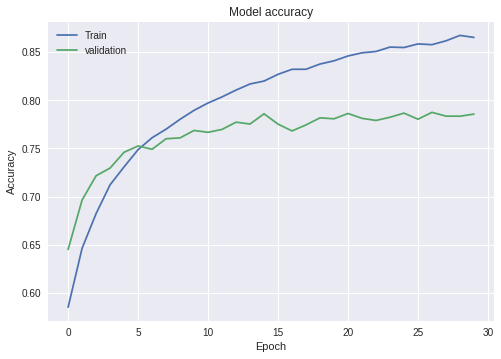

In [0]:
import matplotlib.pyplot as plt
plt.plot(A[1])
plt.plot(A[2])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

The classifier will not perform much better if I set it to train a longer time. Training on the same dataset for a really long time may gain a really small training error. However, this is not good when testing. The network tends to overfit if we overly trained it. So, although a low training error can be gained from long time training, the performance of this classifier may actually decrease.

### Problem 4.5

Suggest at least three different ways to improve the performance of the classifier defined in this Part. For each way, explain why that would help. This is an open-ended question, and answers may vary. Do _not_ implement your suggestions, and do _not_ refer to techniques we have not covered in class (such as batch normalization or other techniques you may have heard of).

If you suggest more than three ways, we will grade you for the best ones. However, we _will_ deduct points for patently wrong statements in any of your suggestions.

### Answer

First, we can enlarge the size of the training set. Using more data to train . the model can effectively reduce overfitting, which leads to a better performace of this classifier.
Second, we can choose a better learning rate by cross-validation. Learning rate is a parameter of critical importance. a rate that is too large leads to large steps that often overshoot, and a rate that is too small leads to very slow progress. So, choosing the learning rate properly is also a way to improve performance.
Third, we can choose a good epoch by monitoring the validation error on the validation set. Terminating the algorithm at the point where the validation error starts to increase can prevent overfitting too. By this way, we also can improve the performance of the classifier.
Fourth, choosing a proper batch size can also be helpful. It turns out that small values of batch size achieve the best compromise between reducing variance and keeping steps flexible. We can also choose a proper batch size by cross-validation to improve the performance of the classifier.

